In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


import re

from nltk.corpus import stopwords
import pickle

from tqdm import tqdm
import os

In [ ]:
project_data = pd.read_csv('train_data.csv', nrows=73196)
resource_data = pd.read_csv('resources.csv')

In [ ]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (73196, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [ ]:
project_data.isna().sum()

Unnamed: 0                                          0
id                                                  0
teacher_id                                          0
teacher_prefix                                      3
school_state                                        0
project_submitted_datetime                          0
project_grade_category                              0
project_subject_categories                          0
project_subject_subcategories                       0
project_title                                       0
project_essay_1                                     0
project_essay_2                                     0
project_essay_3                                 70702
project_essay_4                                 70702
project_resource_summary                            0
teacher_number_of_previously_posted_projects        0
project_is_approved                                 0
dtype: int64

In [ ]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [ ]:
resource_data.isna().sum()

id               0
description    292
quantity         0
price            0
dtype: int64

# Preprocessing Categorical Features: project_grade_category

In [ ]:
project_data['project_grade_category'].value_counts()

project_grade_category
Grades PreK-2    29581
Grades 3-5       25001
Grades 6-8       11290
Grades 9-12       7324
Name: count, dtype: int64

In [ ]:
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace(' ','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace('-','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.lower()
project_data['project_grade_category'].value_counts()

project_grade_category
grades_prek_2    29581
grades_3_5       25001
grades_6_8       11290
grades_9_12       7324
Name: count, dtype: int64

#  Preprocessing Categorical Features: project_subject_categories

In [ ]:
project_data['project_subject_categories'].value_counts()

project_subject_categories
Literacy & Language                           15920
Math & Science                                11374
Literacy & Language, Math & Science            9802
Health & Sports                                6880
Music & The Arts                               3481
Special Needs                                  2795
Literacy & Language, Special Needs             2633
Applied Learning                               2485
Math & Science, Literacy & Language            1517
Applied Learning, Literacy & Language          1498
Math & Science, Special Needs                  1257
History & Civics                               1232
Literacy & Language, Music & The Arts          1180
Math & Science, Music & The Arts               1125
Applied Learning, Special Needs                1000
History & Civics, Literacy & Language           952
Health & Sports, Special Needs                  906
Warmth, Care & Hunger                           886
Math & Science, Applied Learning     

In [ ]:
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(' The ','')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(' ','')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace('&','_')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(',','_')
project_data["clean_categories"] = project_data['project_subject_categories'].str.lower()
project_data['clean_categories'].value_counts()

clean_categories
literacy_language                       15920
math_science                            11374
literacy_language_math_science           9802
health_sports                            6880
music_arts                               3481
specialneeds                             2795
literacy_language_specialneeds           2633
appliedlearning                          2485
math_science_literacy_language           1517
appliedlearning_literacy_language        1498
math_science_specialneeds                1257
history_civics                           1232
literacy_language_music_arts             1180
math_science_music_arts                  1125
appliedlearning_specialneeds             1000
history_civics_literacy_language          952
health_sports_specialneeds                906
warmth_care_hunger                        886
math_science_appliedlearning              826
appliedlearning_math_science              711
health_sports_literacy_language           546
literacy_language

# Preprocessing Categorical Features: teacher_prefix

In [ ]:
project_data['teacher_prefix'].value_counts()

teacher_prefix
Mrs.       38229
Ms.        26286
Mr.         7122
Teacher     1551
Dr.            5
Name: count, dtype: int64

In [ ]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.replace('.','')
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.lower()
project_data['teacher_prefix'].value_counts()

teacher_prefix
mrs        38229
ms         26286
mr          7122
teacher     1551
dr             5
Name: count, dtype: int64

# Preprocessing Categorical Features: project_subject_subcategories

In [ ]:
project_data['project_subject_subcategories'].value_counts()

project_subject_subcategories
Literacy                                   6434
Literacy, Mathematics                      5574
Literature & Writing, Mathematics          3966
Literacy, Literature & Writing             3745
Mathematics                                3583
                                           ... 
Visual Arts, Warmth, Care & Hunger            1
Financial Literacy, Social Sciences           1
Economics, Nutrition Education                1
Economics, Other                              1
Civics & Government, Parent Involvement       1
Name: count, Length: 395, dtype: int64

In [ ]:
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(' The ','')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(' ','')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace('&','_')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(',','_')
project_data['clean_subcategories'] = project_data['project_subject_subcategories'].str.lower()
project_data['clean_subcategories'].value_counts()

clean_subcategories
literacy                               6434
literacy_mathematics                   5574
literature_writing_mathematics         3966
literacy_literature_writing            3745
mathematics                            3583
                                       ... 
visualarts_warmth_care_hunger             1
financialliteracy_socialsciences          1
economics_nutritioneducation              1
economics_other                           1
civics_government_parentinvolvement       1
Name: count, Length: 395, dtype: int64

# Preprocessing Categorical Features: school_state

In [ ]:
project_data['school_state'].value_counts()

school_state
CA    10223
NY     4947
TX     4928
FL     4166
NC     3460
IL     2908
GA     2668
SC     2637
MI     2137
PA     2042
MO     1751
IN     1750
OH     1665
MA     1604
LA     1600
WA     1582
OK     1569
NJ     1500
AZ     1411
VA     1398
WI     1224
UT     1176
AL     1170
CT     1131
TN     1119
MD      989
NV      936
KY      882
MS      880
OR      826
MN      800
CO      775
AR      674
ID      464
IA      446
KS      416
NM      364
DC      354
HI      332
ME      332
WV      315
AK      237
DE      222
NE      214
NH      213
SD      204
RI      186
MT      154
ND       97
WY       69
VT       49
Name: count, dtype: int64

In [ ]:
project_data['school_state'] = project_data['school_state'].str.lower()
project_data['school_state'].value_counts()

school_state
ca    10223
ny     4947
tx     4928
fl     4166
nc     3460
il     2908
ga     2668
sc     2637
mi     2137
pa     2042
mo     1751
in     1750
oh     1665
ma     1604
la     1600
wa     1582
ok     1569
nj     1500
az     1411
va     1398
wi     1224
ut     1176
al     1170
ct     1131
tn     1119
md      989
nv      936
ky      882
ms      880
or      826
mn      800
co      775
ar      674
id      464
ia      446
ks      416
nm      364
dc      354
hi      332
me      332
wv      315
ak      237
de      222
ne      214
nh      213
sd      204
ri      186
mt      154
nd       97
wy       69
vt       49
Name: count, dtype: int64

# Preprocessing Categorical Features: project_title

In [ ]:
project_data['project_title'].head(5)

0     Educational Support for English Learners at Home
1                Wanted: Projector for Hungry Learners
2    Soccer Equipment for AWESOME Middle School Stu...
3                               Techie Kindergarteners
4                               Interactive Math Tools
Name: project_title, dtype: object

In [ ]:
print("printing some random reviews")
print(9, project_data['project_title'].values[9])
print(34, project_data['project_title'].values[34])
print(147, project_data['project_title'].values[147])

printing some random reviews
9 Just For the Love of Reading--\r\nPure Pleasure
34 \"Have A Ball!!!\"
147 Who needs a Chromebook?\r\nWE DO!!


In [ ]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [ ]:
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [ ]:
preprocessed_titles = preprocess_text(project_data['project_title'].values)

100%|██████████| 73196/73196 [00:00<00:00, 103860.90it/s]


In [ ]:
print("printing some random reviews")
print(9, preprocessed_titles[9])
print(34, preprocessed_titles[34])
print(147, preprocessed_titles[147])

printing some random reviews
9 love reading pure pleasure
34 ball
147 needs chromebook


# Preprocessing Categorical Features: essay

In [ ]:
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [ ]:
print("printing some random essay")
print(9, project_data['essay'].values[9])
print('-'*50)
print(34, project_data['essay'].values[34])
print('-'*50)
print(147, project_data['essay'].values[147])

printing some random essay
9 Over 95% of my students are on free or reduced lunch.  I have a few who are homeless, but despite that, they come to school with an eagerness to learn.  My students are inquisitive eager learners who  embrace the challenge of not having great books and other resources  every day.  Many of them are not afforded the opportunity to engage with these big colorful pages of a book on a regular basis at home and they don't travel to the public library.  \r\nIt is my duty as a teacher to do all I can to provide each student an opportunity to succeed in every aspect of life. \r\nReading is Fundamental! My students will read these books over and over again while boosting their comprehension skills. These books will be used for read alouds, partner reading and for Independent reading. \r\nThey will engage in reading to build their \"Love for Reading\" by reading for pure enjoyment. They will be introduced to some new authors as well as some old favorites. I want my st

In [ ]:
preprocessed_essays = preprocess_text(project_data['essay'].values)

100%|██████████| 73196/73196 [00:16<00:00, 4411.00it/s]


In [ ]:
print("printing some random essay")
print(9, preprocessed_essays[9])
print('-'*50)
print(34, preprocessed_essays[34])
print('-'*50)
print(147, preprocessed_essays[147])

printing some random essay
9 95 students free reduced lunch homeless despite come school eagerness learn students inquisitive eager learners embrace challenge not great books resources every day many not afforded opportunity engage big colorful pages book regular basis home not travel public library duty teacher provide student opportunity succeed every aspect life reading fundamental students read books boosting comprehension skills books used read alouds partner reading independent reading engage reading build love reading reading pure enjoyment introduced new authors well old favorites want students ready 21st century know pleasure holding good hard back book hand nothing like good book read students soar reading consideration generous funding contribution help build stamina prepare 3rd grade thank much reading proposal nannan
--------------------------------------------------
34 students mainly come extremely low income families majority come homes parents work full time students s

# Preprocessing Numerical Values: price

In [ ]:
project_data.shape

(73196, 20)

In [ ]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [ ]:
# join two dataframes in python:
preprocessed_data = pd.merge(project_data, price_data, on='id', how='left')
preprocessed_data = preprocessed_data[["school_state",	"teacher_prefix",
 "project_grade_category",	"teacher_number_of_previously_posted_projects",	"project_is_approved",
 "clean_categories",	"clean_subcategories",	"essay",	"price"]]

In [ ]:
preprocessed_data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,in,mrs,grades_prek_2,0,0,literacy_language,esl_literacy,My students are English learners that are work...,154.60
1,fl,mr,grades_6_8,7,1,history_civics_health_sports,civics_government_teamsports,Our students arrive to our school eager to lea...,299.00
2,az,ms,grades_6_8,1,0,health_sports,health_wellness_teamsports,"\r\n\""True champions aren't always the ones th...",516.85
3,ky,mrs,grades_prek_2,4,1,literacy_language_math_science,literacy_mathematics,I work at a unique school filled with both ESL...,232.90
4,tx,mrs,grades_prek_2,1,1,math_science,mathematics,Our second grade classroom next year will be m...,67.98


In [ ]:
preprocessed_data.isna().sum()

school_state                                    0
teacher_prefix                                  3
project_grade_category                          0
teacher_number_of_previously_posted_projects    0
project_is_approved                             0
clean_categories                                0
clean_subcategories                             0
essay                                           0
price                                           0
dtype: int64

In [ ]:
preprocessed_data.dropna(inplace =True)

# Defining Some Utility Functions

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer

from sklearn.model_selection import train_test_split


from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_auc_score
from scipy.sparse import hstack
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

In [ ]:
def vectorizer(train, test, column, ngram_range = (1, 1), min_df = 1, max_features = None, vectorizer = 'TFIDF'):

  if vectorizer == 'TFIDF':
    Vectorizer = TfidfVectorizer(ngram_range = ngram_range, min_df = min_df, max_features = max_features)
  else:
    Vectorizer = CountVectorizer(ngram_range = ngram_range, min_df = min_df, max_features = max_features)

  vocabulary = Vectorizer.fit(train[column].values)
  print("="*60)
  print("VECTORIZER USED: ", vectorizer)
  print("="*60)
  print("FEATURE: ", column)

  X_train = vocabulary.transform(train[column].values)
  X_test = vocabulary.transform(test[column].values)

  print("="*60)
  print("TRAIN SHAPE: ", X_train.shape)
  print("TEST SHAPE: ", X_test.shape)
  print("="*60)

  return X_train, X_test, Vectorizer



In [ ]:
def vec(data, column):

  with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())


  tfidf_model = TfidfVectorizer()
  tfidf_model.fit(data[column].values)
  dictionary = dict(zip(tfidf_model.get_feature_names_out(), list(tfidf_model.idf_)))
  tfidf_words = set(tfidf_model.get_feature_names_out())

  tfidf_w2v_vectors = [];
  for sentence in tqdm(data[column].values):
      vector = np.zeros(300)
      tf_idf_weight =0;
      for word in sentence.split():
          if (word in glove_words) and (word in tfidf_words):
              vec = model[word]
              tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))
              vector += (vec * tf_idf)
              tf_idf_weight += tf_idf
      if tf_idf_weight != 0:
          vector /= tf_idf_weight
      tfidf_w2v_vectors.append(vector)
  return np.array(tfidf_w2v_vectors)

def vectorizerTFIDFW2V(train, test, column):

  print("="*60)
  print("VECTORIZER USED: TFIDF Weighted W2V")
  print("="*60)
  print("FEATURE: ", column)

  print("="*60)
  X_train = vec(train, column)
  print("TRAIN SHAPE: ", X_train.shape)
  X_test = vec(test, column)
  print("TEST SHAPE: ", X_test.shape)
  print("="*60)

  return X_train, X_test


In [ ]:

def normalizer(train, test, feature):
  normalizer = Normalizer()
  normalizer.fit(train[feature].values.reshape(-1, 1))

  X_train_norm = normalizer.transform(train[feature].values.reshape(-1,1))
  X_test_norm = normalizer.transform(test[feature].values.reshape(-1,1))

  print("="*60)
  print("FEATURE: ", feature)
  print("="*60)
  print("TRAIN SHAPE: ", X_train_norm.shape)
  print("TEST SHAPE: ", X_test_norm.shape)
  print("="*60)

  return X_train_norm, X_test_norm



In [ ]:
import seaborn as sns

def ROC_AUC(y_train, y_train_pred, y_test, y_test_pred):
  train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
  test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)

  plt.figure(figsize = (10, 8))
  plt.plot(train_fpr, train_tpr, label = 'Train AUC = {}'.format(auc(train_fpr, train_tpr)))
  plt.plot(test_fpr, test_tpr, label = 'Test AUC = {}'.format(auc(test_fpr, test_tpr)))
  plt.legend()
  plt.title("ROC Curve with AUC")
  plt.xlabel('FPR ---->')
  plt.ylabel('TPR ---->')
  plt.grid()

def best_threshold(fpr, tpr, threshold):
  tr = threshold[np.argmax(tpr * (1 - fpr))]
  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(tr, 3))
  return tr

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

def confusion(yActual, yPredicted, label):

  fpr, tpr, thresholds = roc_curve(yActual, yPredicted)
  bestThreshold = best_threshold(fpr, tpr, thresholds)
  yPredicted = predict_with_best_t(yPredicted, bestThreshold)
  conf_mat = confusion_matrix(yActual, yPredicted)

  print("="*30)
  print("Confusion matrix on {} data".format(label))
  print("="*30)
  print(conf_mat)
  sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Oranges')
  plt.xlabel('PREDICTED')
  plt.ylabel('ACTUAL')

# Feature Extraction: Sentiment Scores

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
neg = []
neu = []
pos = []
compound = []

for essay in tqdm(preprocessed_data['essay']):
  scores = sid.polarity_scores(essay)

  neg.append(scores['neg'])
  neu.append(scores['neu'])
  pos.append(scores['pos'])
  compound.append(scores['compound'])
preprocessed_data['neg'] = neg
preprocessed_data['neu'] = neu
preprocessed_data['pos'] = pos
preprocessed_data['compound'] = compound

100%|██████████| 73193/73193 [01:25<00:00, 855.16it/s]


In [ ]:
preprocessed_data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,neg,neu,pos,compound
0,in,mrs,grades_prek_2,0,0,literacy_language,esl_literacy,My students are English learners that are work...,154.60,0.008,0.911,0.081,0.9611
1,fl,mr,grades_6_8,7,1,history_civics_health_sports,civics_government_teamsports,Our students arrive to our school eager to lea...,299.00,0.037,0.845,0.118,0.9447
2,az,ms,grades_6_8,1,0,health_sports,health_wellness_teamsports,"\r\n\""True champions aren't always the ones th...",516.85,0.058,0.759,0.184,0.9956
3,ky,mrs,grades_prek_2,4,1,literacy_language_math_science,literacy_mathematics,I work at a unique school filled with both ESL...,232.90,0.052,0.733,0.214,0.9931
4,tx,mrs,grades_prek_2,1,1,math_science,mathematics,Our second grade classroom next year will be m...,67.98,0.016,0.897,0.087,0.9192


# Splitting Data

In [ ]:
Y = preprocessed_data['project_is_approved'].values
X = preprocessed_data.drop(['project_is_approved'], axis = 1)

In [ ]:
X.shape,Y.shape

((73193, 12), (73193,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)

##  Vectorization (TFIDF W2V)

In [ ]:
train_essay_TFIDF_W2V, test_essay_TFIDF_W2V = vectorizerTFIDFW2V(X_train, X_test, column = 'essay')

VECTORIZER USED: TFIDF Weighted W2V
FEATURE:  essay


100%|██████████| 58554/58554 [01:16<00:00, 765.56it/s]


TRAIN SHAPE:  (58554, 300)


100%|██████████| 14639/14639 [00:19<00:00, 746.76it/s]


TEST SHAPE:  (14639, 300)


##  Encoding Categorical Features
    a. school_state
    b. teacher_prefix
    c. project_grade_category
    d. clean_categories
    e. clean_subcategories

In [ ]:
train_school, test_school, schoolVec = vectorizer(X_train, X_test, 'school_state', vectorizer = 'BOW')
print("\n\n")
train_prefix, test_prefix, teacherVec = vectorizer(X_train, X_test, 'teacher_prefix', vectorizer = 'BOW')
print("\n\n")
train_grade, test_grade, gradeVec = vectorizer(X_train, X_test, 'project_grade_category', vectorizer = 'BOW')
print("\n\n")
train_categories, test_categories, catVec = vectorizer(X_train, X_test, 'clean_categories', vectorizer = 'BOW')
print("\n\n")
train_subcategories, test_subcategories, subcatVec = vectorizer(X_train, X_test, 'clean_subcategories', vectorizer = 'BOW')

VECTORIZER USED:  BOW
FEATURE:  school_state
TRAIN SHAPE:  (58554, 51)
TEST SHAPE:  (14639, 51)



VECTORIZER USED:  BOW
FEATURE:  teacher_prefix
TRAIN SHAPE:  (58554, 5)
TEST SHAPE:  (14639, 5)



VECTORIZER USED:  BOW
FEATURE:  project_grade_category
TRAIN SHAPE:  (58554, 4)
TEST SHAPE:  (14639, 4)



VECTORIZER USED:  BOW
FEATURE:  clean_categories
TRAIN SHAPE:  (58554, 50)
TEST SHAPE:  (14639, 50)



VECTORIZER USED:  BOW
FEATURE:  clean_subcategories
TRAIN SHAPE:  (58554, 387)
TEST SHAPE:  (14639, 387)


## Encoding Numerical Features
    a. price
    b. teacher_number_of_previously_posted_projects
    c. neg
    d. neu
    e. pos
    f. compound


In [ ]:
train_price, test_price = normalizer(X_train, X_test, 'price')
print("\n\n")
train_previous, test_previous = normalizer(X_train, X_test, 'teacher_number_of_previously_posted_projects')
print("\n\n")
train_neg, test_neg = normalizer(X_train, X_test, 'neg')
print("\n\n")
train_neu, test_neu = normalizer(X_train, X_test, 'neu')
print("\n\n")
train_pos, test_pos = normalizer(X_train, X_test, 'pos')
print("\n\n")
train_compound, test_compound = normalizer(X_train, X_test, 'compound')

FEATURE:  price
TRAIN SHAPE:  (58554, 1)
TEST SHAPE:  (14639, 1)



FEATURE:  teacher_number_of_previously_posted_projects
TRAIN SHAPE:  (58554, 1)
TEST SHAPE:  (14639, 1)



FEATURE:  neg
TRAIN SHAPE:  (58554, 1)
TEST SHAPE:  (14639, 1)



FEATURE:  neu
TRAIN SHAPE:  (58554, 1)
TEST SHAPE:  (14639, 1)



FEATURE:  pos
TRAIN SHAPE:  (58554, 1)
TEST SHAPE:  (14639, 1)



FEATURE:  compound
TRAIN SHAPE:  (58554, 1)
TEST SHAPE:  (14639, 1)


# Concatenating(TFIDF_W2V)

In [ ]:
X_train = hstack((train_essay_TFIDF_W2V, train_school, train_prefix, train_grade, train_categories, train_subcategories, train_price, train_previous, train_neg, train_neu, train_pos, train_compound)).tocsr()
X_test = hstack((test_essay_TFIDF_W2V, test_school, test_prefix, test_grade, test_categories, test_subcategories, test_price, test_previous, test_neg, test_neu, test_pos, test_compound)).tocsr()

print("Final Data Matrix of SET 1")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

Final Data Matrix of SET 1
(58554, 803) (58554,)
(14639, 803) (14639,)


## Decision Tree Model(TFIDF_W2V)

In [ ]:
%%time
params = {'max_depth': [1, 3, 10,30],
          'min_samples_split': [5, 10, 100, 500]}
DT2 = DecisionTreeClassifier()
clf = GridSearchCV(DT2, params, cv = 5, scoring = 'roc_auc', return_train_score = True, n_jobs = -1, verbose = 4)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
CPU times: user 22.1 s, sys: 1.6 s, total: 23.7 s
Wall time: 3min 16s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 10, 30],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc', verbose=4)

In [ ]:
print('Best score: ',clf.best_score_)
print('alpha value with best score: ',clf.best_params_)
print('='*40)

results = pd.DataFrame(clf.cv_results_)[['param_max_depth', 'param_min_samples_split', 'mean_train_score', 'mean_test_score', 'params']]
train_auc = results['mean_train_score']
cv_auc = results['mean_test_score']

Best score:  0.5765995226413679
alpha value with best score:  {'max_depth': 10, 'min_samples_split': 500}


Text(0.5, 1.0, 'TRAIN heatmap')

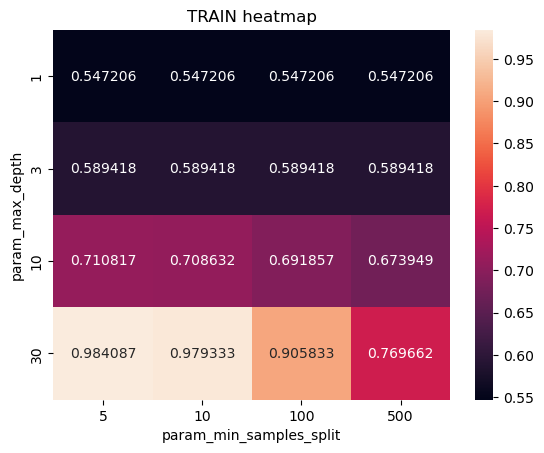

In [ ]:
h = results.pivot(index = 'param_max_depth', columns = 'param_min_samples_split', values = 'mean_train_score')
sns.heatmap(h, annot = True, fmt = 'f').set_title('TRAIN heatmap')

Text(0.5, 1.0, 'CV heatmap')

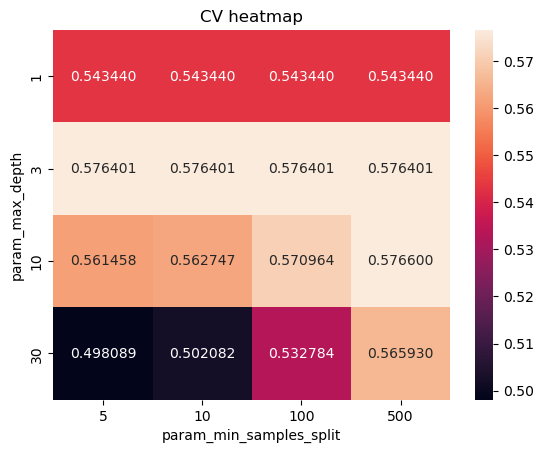

In [ ]:
h = results.pivot(index = 'param_max_depth', columns = 'param_min_samples_split', values = 'mean_test_score')
sns.heatmap(h, annot = True, fmt = 'f').set_title('CV heatmap')

### Fitting model with best hyperparameters

In [ ]:
max_depth = clf.best_params_['max_depth']
min_samples_split = clf.best_params_['min_samples_split']

best_model_dt = DecisionTreeClassifier(max_depth = max_depth,
                                       min_samples_split = min_samples_split)
best_model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=500)

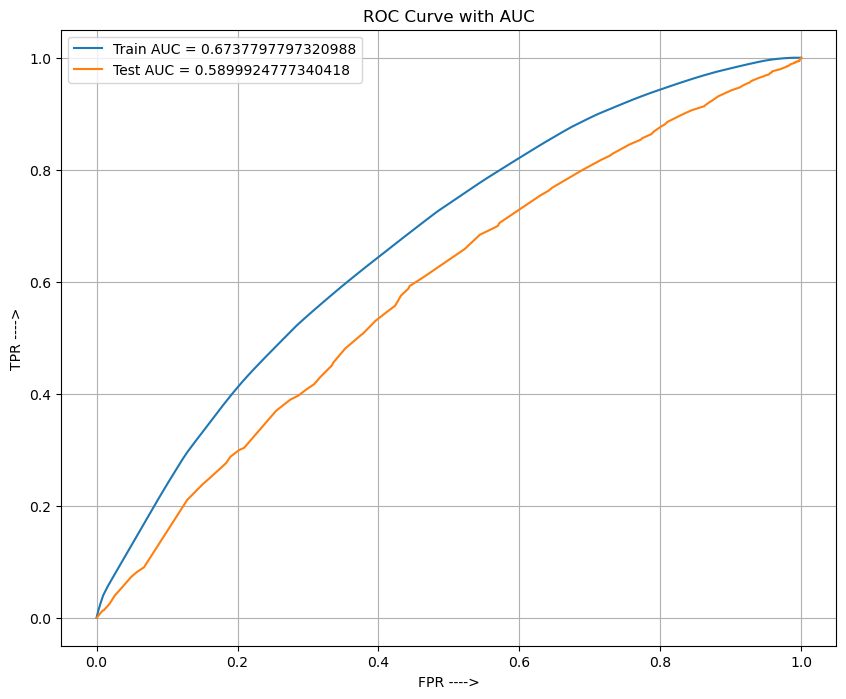

In [ ]:
y_train_prediction_probabilities = best_model_dt.predict_proba(X_train)[:,1]
y_test_prediction_probabilities = best_model_dt.predict_proba(X_test)[:,1]

ROC_AUC(y_train, y_train_prediction_probabilities, y_test, y_test_prediction_probabilities)

### Confusion Matrix

the maximum value of tpr*(1-fpr) 0.3870353633175385 for threshold 0.85
Confusion matrix on TRAIN data
[[ 5494  3374]
 [18646 31040]]


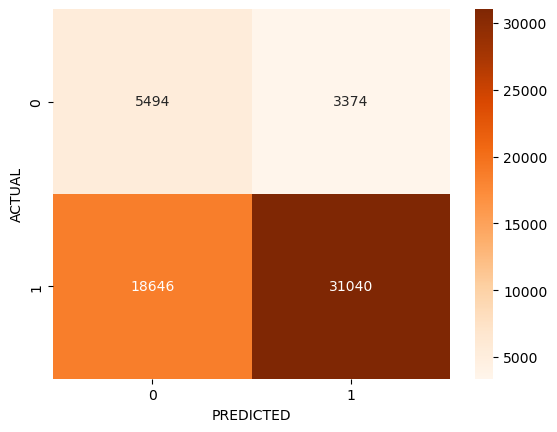

In [ ]:
confusion(y_train, y_train_prediction_probabilities, 'TRAIN')

the maximum value of tpr*(1-fpr) 0.32916471402208325 for threshold 0.851
Confusion matrix on TEST data
[[1232  985]
 [5064 7358]]


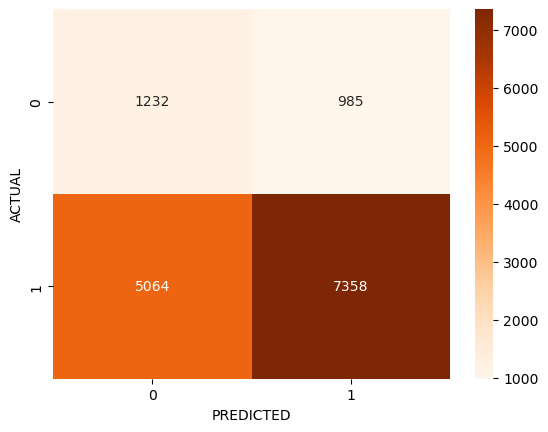

In [ ]:
confusion(y_test, y_test_prediction_probabilities, 'TEST')

## RandomForestClassifier Model(TFIDF_W2V)

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
params = {'max_features': [100, 200, 500],'n_estimators': [500,1000,1200]}
RF = RandomForestClassifier()
clf = GridSearchCV(RF, params, cv = 3, scoring = 'roc_auc', return_train_score = True, n_jobs = -1, verbose = 4)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/5] END max_depth=1, min_samples_split=100;, score=(train=0.548, test=0.542) total time=  10.7s
[CV 5/5] END max_depth=3, min_samples_split=100;, score=(train=0.588, test=0.574) total time=  15.0s
[CV 2/5] END max_depth=30, min_samples_split=10;, score=(train=0.979, test=0.510) total time= 2.3min
[CV 4/5] END max_depth=3, min_samples_split=5;, score=(train=0.592, test=0.580) total time=  18.2s
[CV 1/5] END max_depth=30, min_samples_split=5;, score=(train=0.984, test=0.497) total time= 2.5min
[CV 4/5] END max_depth=1, min_samples_split=10;, score=(train=0.547, test=0.544) total time=  10.8s
[CV 2/5] END max_depth=3, min_samples_split=500;, score=(train=0.594, test=0.565) total time=  14.2s
[CV 3/5] END max_depth=30, min_samples_split=10;, score=(train=0.976, test=0.500) total time= 2.3min
[CV 4/5] END max_depth=1, min_samples_split=500;, score=(train=0.547, test=0.544) total time=  11.4s
[CV 4/5] END max_depth=3, min_sampl

In [ ]:
print('Best score: ',clf.best_score_)
print('alpha value with best score: ',clf.best_params_)
print('='*40)

results = pd.DataFrame(clf.cv_results_)[['param_max_features', 'param_n_estimators', 'mean_train_score', 'mean_test_score', 'params']]
train_auc = results['mean_train_score']
cv_auc = results['mean_test_score']

Best score:  0.5988557396199145
alpha value with best score:  {'max_features': 100, 'n_estimators': 1200}


Text(0.5, 1.0, 'TRAIN heatmap')

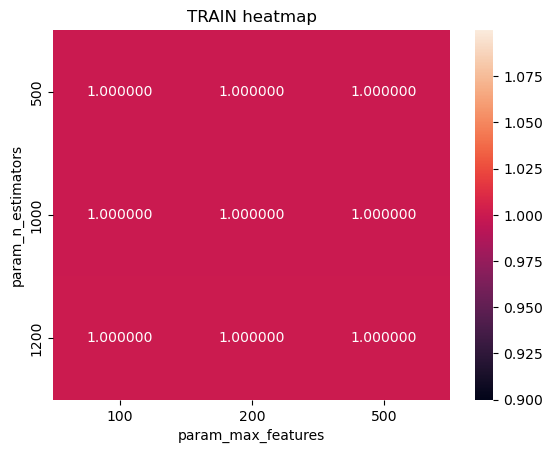

In [ ]:
h = results.pivot(index = 'param_n_estimators', columns = 'param_max_features', values = 'mean_train_score')
sns.heatmap(h, annot = True, fmt = 'f').set_title('TRAIN heatmap')

Text(0.5, 1.0, 'CV heatmap')

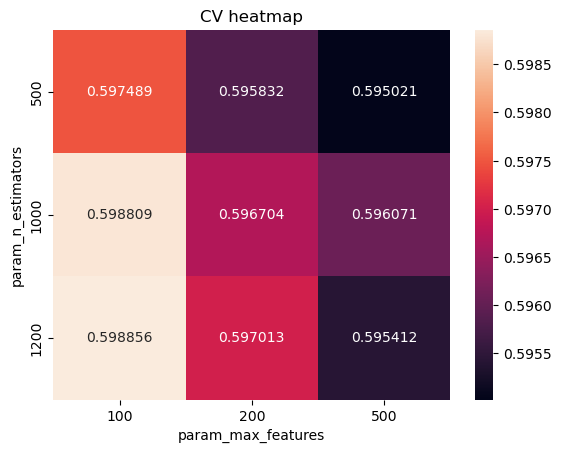

In [ ]:
h = results.pivot(index = 'param_n_estimators', columns = 'param_max_features', values = 'mean_test_score')
sns.heatmap(h, annot = True, fmt = 'f').set_title('CV heatmap')

### Fitting model with best hyperparameters

In [ ]:
%%time
n_estimators = clf.best_params_['n_estimators']
max_features = clf.best_params_['max_features']

best_model_rf = RandomForestClassifier(n_estimators = n_estimators,
                                       max_features = max_features, verbose = 2,n_jobs =-1)
best_model_rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


building tree 1 of 1200
building tree 2 of 1200
building tree 3 of 1200
building tree 4 of 1200
building tree 5 of 1200
building tree 6 of 1200
building tree 7 of 1200
building tree 8 of 1200
building tree 9 of 1200
building tree 10 of 1200
building tree 11 of 1200
building tree 12 of 1200
building tree 13 of 1200
building tree 14 of 1200
building tree 15 of 1200
building tree 16 of 1200
building tree 17 of 1200
building tree 18 of 1200
building tree 19 of 1200
building tree 20 of 1200
building tree 21 of 1200
building tree 22 of 1200
building tree 23 of 1200
building tree 24 of 1200
building tree 25 of 1200
building tree 26 of 1200
building tree 27 of 1200
building tree 28 of 1200
building tree 29 of 1200
building tree 30 of 1200
building tree 31 of 1200
building tree 32 of 1200
building tree 33 of 1200
building tree 34 of 1200
building tree 35 of 1200
building tree 36 of 1200
building tree 37 of 1200
building tree 38 of 1200
building tree 39 of 1200
building tree 40 of 1200
building 

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  1.6min


building tree 131 of 1200
building tree 132 of 1200
building tree 133 of 1200
building tree 134 of 1200
building tree 135 of 1200
building tree 136 of 1200
building tree 137 of 1200
building tree 138 of 1200
building tree 139 of 1200
building tree 140 of 1200
building tree 141 of 1200
building tree 142 of 1200
building tree 143 of 1200
building tree 144 of 1200
building tree 145 of 1200
building tree 146 of 1200
building tree 147 of 1200
building tree 148 of 1200
building tree 149 of 1200
building tree 150 of 1200
building tree 151 of 1200
building tree 152 of 1200
building tree 153 of 1200
building tree 154 of 1200
building tree 155 of 1200
building tree 156 of 1200
building tree 157 of 1200
building tree 158 of 1200
building tree 159 of 1200
building tree 160 of 1200
building tree 161 of 1200
building tree 162 of 1200
building tree 163 of 1200
building tree 164 of 1200
building tree 165 of 1200
building tree 166 of 1200
building tree 167 of 1200
building tree 168 of 1200
building tre

[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:  4.8min


building tree 336 of 1200
building tree 337 of 1200
building tree 338 of 1200
building tree 339 of 1200
building tree 340 of 1200
building tree 341 of 1200
building tree 342 of 1200
building tree 343 of 1200
building tree 344 of 1200
building tree 345 of 1200
building tree 346 of 1200
building tree 347 of 1200
building tree 348 of 1200
building tree 349 of 1200
building tree 350 of 1200
building tree 351 of 1200
building tree 352 of 1200
building tree 353 of 1200
building tree 354 of 1200
building tree 355 of 1200
building tree 356 of 1200
building tree 357 of 1200
building tree 358 of 1200
building tree 359 of 1200
building tree 360 of 1200
building tree 361 of 1200
building tree 362 of 1200
building tree 363 of 1200
building tree 364 of 1200
building tree 365 of 1200
building tree 366 of 1200
building tree 367 of 1200
building tree 368 of 1200
building tree 369 of 1200
building tree 370 of 1200
building tree 371 of 1200
building tree 372 of 1200
building tree 373 of 1200
building tre

[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:  9.0min


building tree 617 of 1200
building tree 618 of 1200
building tree 619 of 1200
building tree 620 of 1200
building tree 621 of 1200
building tree 622 of 1200
building tree 623 of 1200
building tree 624 of 1200
building tree 625 of 1200
building tree 626 of 1200
building tree 627 of 1200
building tree 628 of 1200
building tree 629 of 1200building tree 630 of 1200

building tree 631 of 1200
building tree 632 of 1200
building tree 633 of 1200
building tree 634 of 1200
building tree 635 of 1200
building tree 636 of 1200
building tree 637 of 1200
building tree 638 of 1200
building tree 639 of 1200
building tree 640 of 1200
building tree 641 of 1200
building tree 642 of 1200
building tree 643 of 1200
building tree 644 of 1200
building tree 645 of 1200
building tree 646 of 1200
building tree 647 of 1200
building tree 648 of 1200
building tree 649 of 1200
building tree 650 of 1200
building tree 651 of 1200
building tree 652 of 1200
building tree 653 of 1200
building tree 654 of 1200
building tre

[Parallel(n_jobs=-1)]: Done 949 tasks      | elapsed: 14.5min


building tree 982 of 1200
building tree 983 of 1200
building tree 984 of 1200
building tree 985 of 1200
building tree 986 of 1200
building tree 987 of 1200
building tree 988 of 1200
building tree 989 of 1200
building tree 990 of 1200
building tree 991 of 1200
building tree 992 of 1200
building tree 993 of 1200
building tree 994 of 1200
building tree 995 of 1200
building tree 996 of 1200
building tree 997 of 1200
building tree 998 of 1200
building tree 999 of 1200
building tree 1000 of 1200
building tree 1001 of 1200
building tree 1002 of 1200
building tree 1003 of 1200
building tree 1004 of 1200
building tree 1005 of 1200
building tree 1006 of 1200
building tree 1007 of 1200
building tree 1008 of 1200
building tree 1009 of 1200
building tree 1010 of 1200
building tree 1011 of 1200
building tree 1012 of 1200
building tree 1013 of 1200
building tree 1014 of 1200
building tree 1015 of 1200
building tree 1016 of 1200
building tree 1017 of 1200
building tree 1018 of 1200
building tree 1019 

[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 18.0min finished


RandomForestClassifier(max_features=100, n_estimators=1200, n_jobs=-1,
                       verbose=2)

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    2.0s
[Parallel(n_jobs=32)]: Done 949 tasks      | elapsed:    3.2s
[Parallel(n_jobs=32)]: Done 1200 out of 1200 | elapsed:    4.0s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 949 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 1200 out of 1200 | elapsed:    0.8s finished


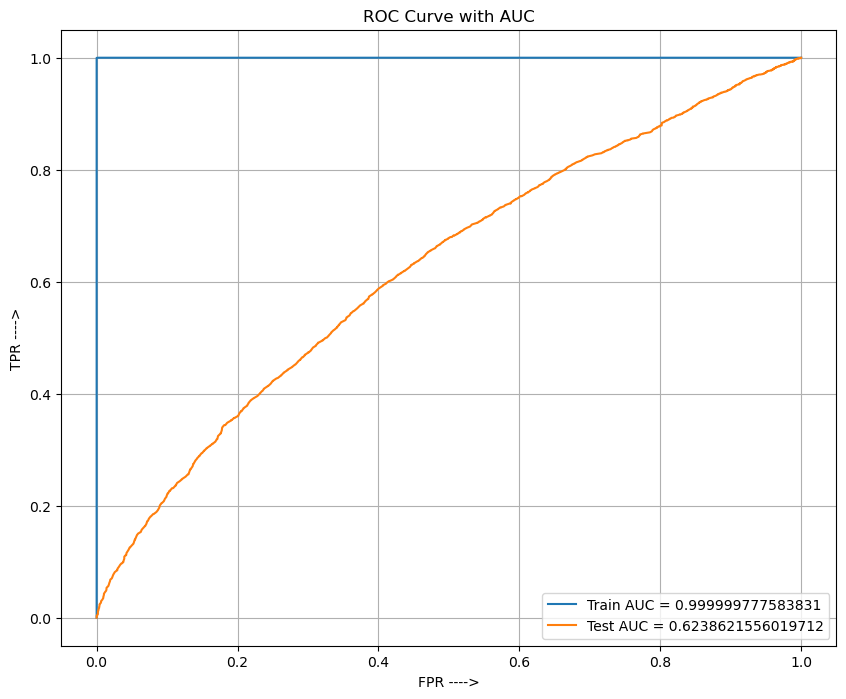

In [ ]:
y_train_prediction_probabilities = best_model_rf.predict_proba(X_train)[:,1]
y_test_prediction_probabilities = best_model_rf.predict_proba(X_test)[:,1]

ROC_AUC(y_train, y_train_prediction_probabilities, y_test, y_test_prediction_probabilities)

### Confusion Matrix

the maximum value of tpr*(1-fpr) 0.9997182304874612 for threshold 0.726
Confusion matrix on TRAIN data
[[ 8868     0]
 [   14 49672]]


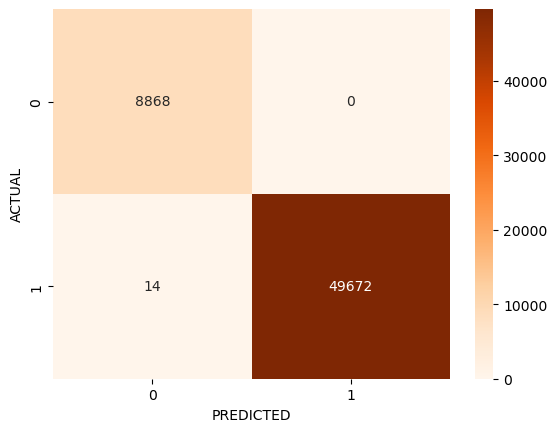

In [ ]:
confusion(y_train, y_train_prediction_probabilities, 'TRAIN')

the maximum value of tpr*(1-fpr) 0.35259572279513113 for threshold 0.829
Confusion matrix on TEST data
[[1328  889]
 [5110 7312]]


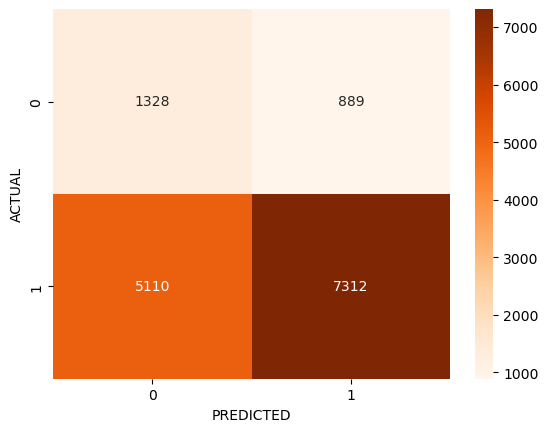

In [ ]:
confusion(y_test, y_test_prediction_probabilities, 'TEST')

## GradientBoostingClassifier Model(TFIDF_W2V)

In [ ]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
params = {'max_depth': [3,5,8],'n_estimators': [200,500,1000]}
GBDT = GradientBoostingClassifier()
clf = GridSearchCV(GBDT, params, cv = 3, scoring = 'roc_auc', return_train_score = True, n_jobs = -1, verbose = 4)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END max_depth=3, n_estimators=200;, score=(train=0.791, test=0.653) total time=22.5min
[CV 2/3] END max_depth=3, n_estimators=200;, score=(train=0.791, test=0.658) total time=22.8min
[CV 3/3] END max_depth=3, n_estimators=200;, score=(train=0.790, test=0.655) total time=22.8min
[CV 1/3] END max_depth=5, n_estimators=200;, score=(train=0.933, test=0.647) total time=36.3min
[CV 2/3] END max_depth=5, n_estimators=200;, score=(train=0.932, test=0.659) total time=36.3min
[CV 3/3] END max_depth=5, n_estimators=200;, score=(train=0.930, test=0.654) total time=36.7min
[CV 2/3] END max_depth=3, n_estimators=500;, score=(train=0.872, test=0.662) total time=52.8min
[CV 1/3] END max_depth=3, n_estimators=500;, score=(train=0.873, test=0.657) total time=52.8min
[CV 3/3] END max_depth=3, n_estimators=500;, score=(train=0.872, test=0.656) total time=53.2min
[CV 1/3] END max_depth=8, n_estimators=200;, score=(train=1.000, test=0.645)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 8],
                         'n_estimators': [200, 500, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=4)

In [ ]:
print('Best score: ',clf.best_score_)
print('alpha value with best score: ',clf.best_params_)
print('='*40)

results = pd.DataFrame(clf.cv_results_)[['param_max_depth', 'param_n_estimators', 'mean_train_score', 'mean_test_score', 'params']]
train_auc = results['mean_train_score']
cv_auc = results['mean_test_score']

Best score:  0.6582535617316804
alpha value with best score:  {'max_depth': 3, 'n_estimators': 500}


Text(0.5, 1.0, 'TRAIN heatmap')

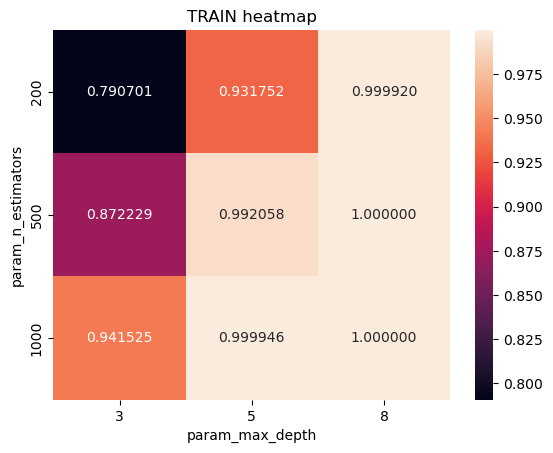

In [ ]:
h = results.pivot(index = 'param_n_estimators', columns = 'param_max_depth', values = 'mean_train_score')
sns.heatmap(h, annot = True, fmt = 'f').set_title('TRAIN heatmap')

Text(0.5, 1.0, 'CV heatmap')

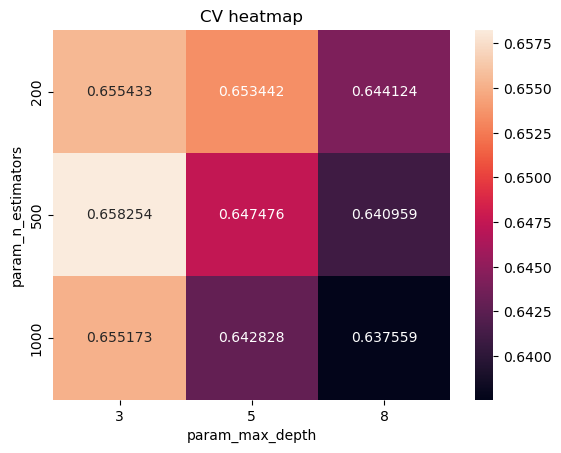

In [ ]:
h = results.pivot(index = 'param_n_estimators', columns = 'param_max_depth', values = 'mean_test_score')
sns.heatmap(h, annot = True, fmt = 'f').set_title('CV heatmap')

In [ ]:
%%time
n_estimators = clf.best_params_['n_estimators']
max_features = clf.best_params_['max_depth']

best_model_gbdt = GradientBoostingClassifier(n_estimators = n_estimators,
                                       max_depth = max_depth, verbose = 2)
best_model_gbdt.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.8234          189.40m
         2           0.7987          194.51m
         3           0.7734          200.12m
         4           0.7496          202.96m
         5           0.7274          206.59m
         6           0.7072          208.02m
         7           0.6900          208.05m
         8           0.6748          207.02m
         9           0.6596          205.67m
        10           0.6437          205.40m
        11           0.6318          203.71m
        12           0.6211          202.20m
        13           0.6114          200.68m
        14           0.6014          199.66m
        15           0.5930          198.82m
        16           0.5827          198.04m
        17           0.5724          196.91m
        18           0.5631          196.32m
        19           0.5558          194.77m
        20           0.5474          193.80m
        21           0.5391          193.26m
        2

GradientBoostingClassifier(max_depth=10, n_estimators=500, verbose=2)

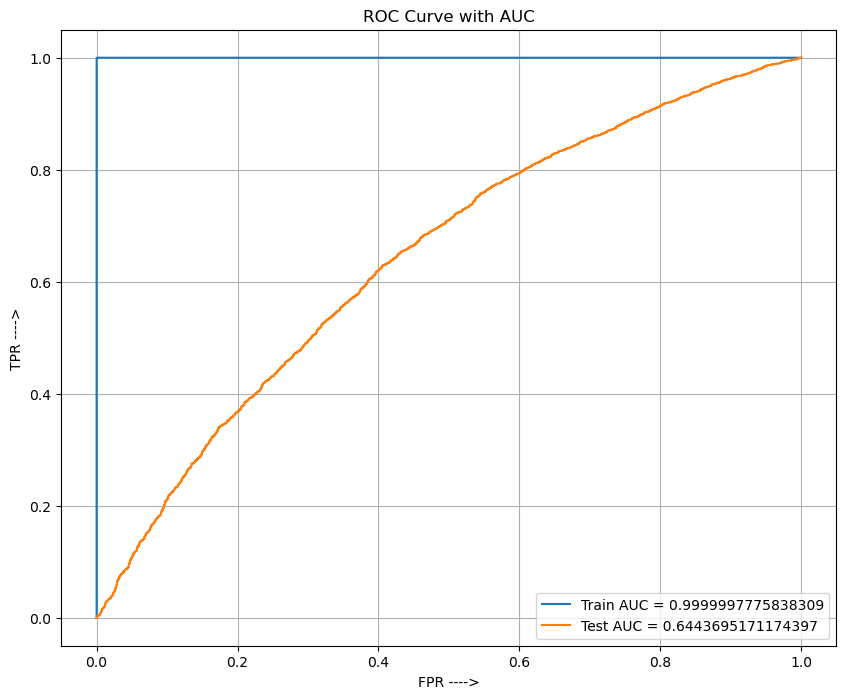

In [ ]:
y_train_prediction_probabilities = best_model_gbdt.predict_proba(X_train)[:,1]
y_test_prediction_probabilities = best_model_gbdt.predict_proba(X_test)[:,1]

ROC_AUC(y_train, y_train_prediction_probabilities, y_test, y_test_prediction_probabilities)

the maximum value of tpr*(1-fpr) 0.9997182304874612 for threshold 0.814
Confusion matrix on TRAIN data
[[ 8868     0]
 [   14 49672]]


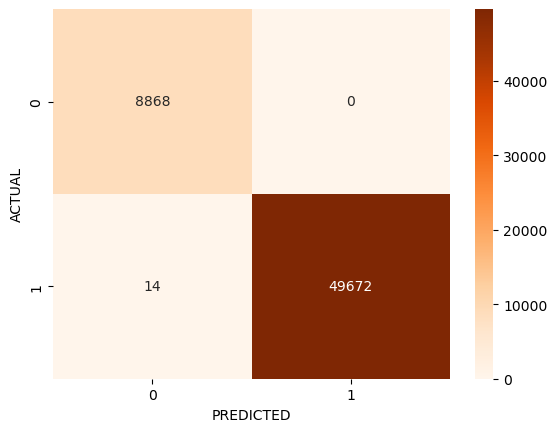

In [ ]:
confusion(y_train, y_train_prediction_probabilities, 'TRAIN')

the maximum value of tpr*(1-fpr) 0.3738219770574519 for threshold 0.973
Confusion matrix on TEST data
[[1318  899]
 [4611 7811]]


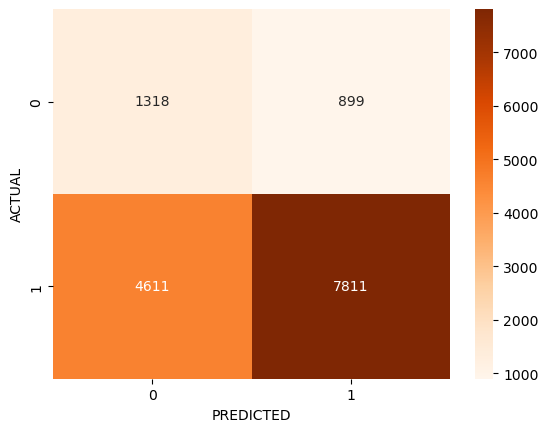

In [ ]:
confusion(y_test, y_test_prediction_probabilities, 'TEST')

## XGBClassifier Model(TFIDF_W2V)

In [ ]:
%%time
import xgboost as xgb
params = {'max_depth': [3,5,8],'n_estimators': [100,200,500,1000,1500]}
XGB = xgb.XGBClassifier()
clf = GridSearchCV(XGB, params, cv = 3, scoring = 'roc_auc', return_train_score = True, n_jobs = -1, verbose = 4)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV 1/3] END max_depth=3, n_estimators=500;, score=(train=0.965, test=0.642) total time= 1.8min
[CV 3/3] END max_depth=3, n_estimators=500;, score=(train=0.964, test=0.642) total time= 1.9min
[CV 1/3] END max_depth=8, n_estimators=100;, score=(train=1.000, test=0.624) total time= 1.9min
[CV 1/3] END max_depth=3, n_estimators=100;, score=(train=0.809, test=0.650) total time=  19.6s
[CV 3/3] END max_depth=8, n_estimators=100;, score=(train=1.000, test=0.620) total time= 1.6min
[CV 2/3] END max_depth=3, n_estimators=500;, score=(train=0.964, test=0.639) total time= 2.2min
CPU times: user 13min 46s, sys: 5.39 s, total: 13min 51s
Wall time: 7min 55s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 8],
                         'n_estimators': [100, 200, 500, 1000, 1500]},
             return_train_score=True, scoring='roc_auc', verbose=4)

In [ ]:
print('Best score: ',clf.best_score_)
print('alpha value with best score: ',clf.best_params_)
print('='*40)

results = pd.DataFrame(clf.cv_results_)[['param_max_depth', 'param_n_estimators', 'mean_train_score', 'mean_test_score', 'params']]
train_auc = results['mean_train_score']
cv_auc = results['mean_test_score']

Best score:  0.6496796941626977
alpha value with best score:  {'max_depth': 3, 'n_estimators': 100}
[CV 3/3] END max_depth=5, n_estimators=500;, score=(train=1.000, test=0.625) total time= 2.9min
[CV 1/3] END max_depth=5, n_estimators=500;, score=(train=1.000, test=0.625) total time= 2.9min
[CV 2/3] END max_depth=5, n_estimators=500;, score=(train=1.000, test=0.625) total time= 3.0min
[CV 2/3] END max_depth=3, n_estimators=100;, score=(train=0.806, test=0.650) total time=  27.8s
[CV 1/3] END max_depth=8, n_estimators=200;, score=(train=1.000, test=0.629) total time= 3.0min
[CV 1/3] END max_depth=3, n_estimators=1000;, score=(train=0.997, test=0.634) total time= 3.5min
[CV 3/3] END max_depth=3, n_estimators=1000;, score=(train=0.997, test=0.631) total time= 3.5min
[CV 2/3] END max_depth=5, n_estimators=100;, score=(train=0.960, test=0.632) total time=  41.9s
[CV 3/3] END max_depth=8, n_estimators=200;, score=(train=1.000, test=0.627) total time= 2.9min
[CV 3/3] END max_depth=3, n_estima

Text(0.5, 1.0, 'TRAIN heatmap')

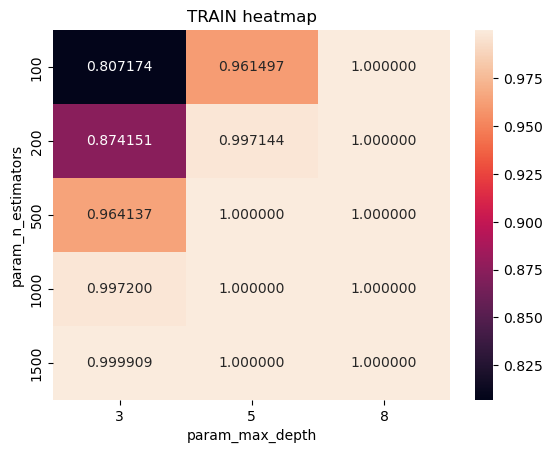

In [ ]:
h = results.pivot(index = 'param_n_estimators', columns = 'param_max_depth', values = 'mean_train_score')
sns.heatmap(h, annot = True, fmt = 'f').set_title('TRAIN heatmap')

Text(0.5, 1.0, 'CV heatmap')

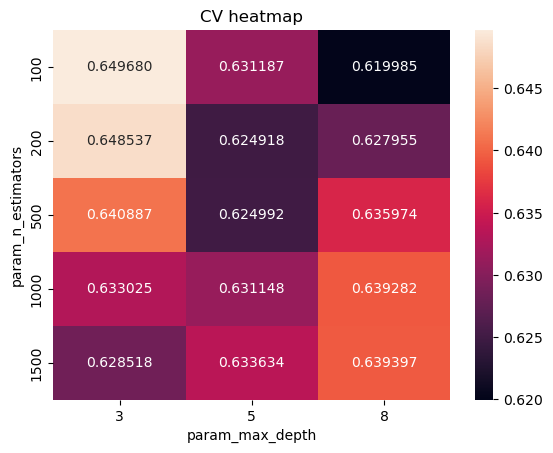

In [ ]:
h = results.pivot(index = 'param_n_estimators', columns = 'param_max_depth', values = 'mean_test_score')
sns.heatmap(h, annot = True, fmt = 'f').set_title('CV heatmap')

In [ ]:
%%time
n_estimators = clf.best_params_['n_estimators']
max_features = clf.best_params_['max_depth']

best_model_xgb = xgb.XGBClassifier(n_estimators = n_estimators,
                                       max_depth = max_depth, verbose = 2, n_jobs = -1)
best_model_xgb.fit(X_train, y_train)

CPU times: user 43min 6s, sys: 2.43 s, total: 43min 8s
Wall time: 2min 11s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
n_estimators

100

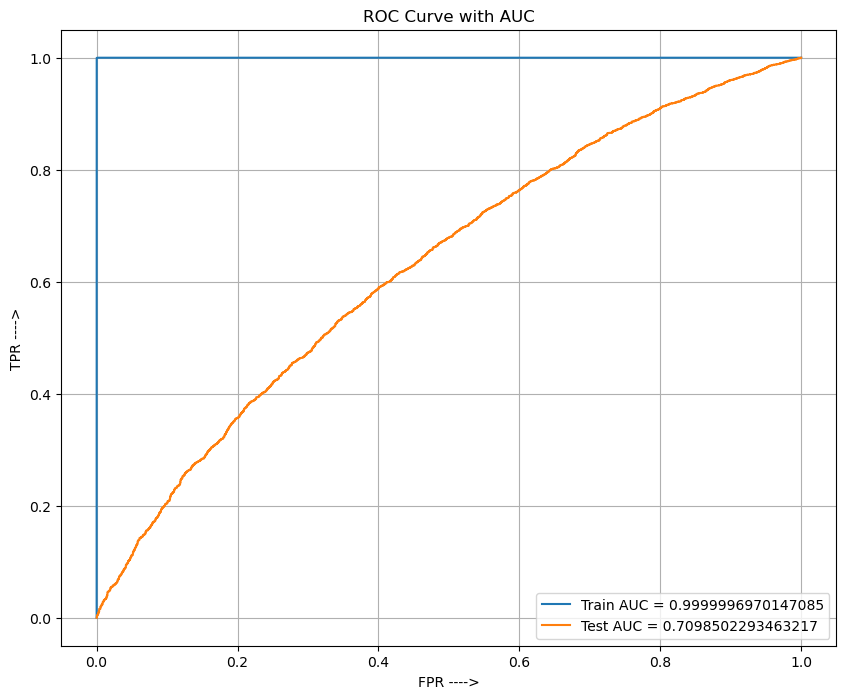

In [ ]:
y_train_prediction_probabilities = best_model_xgb.predict_proba(X_train)[:,1]
y_test_prediction_probabilities = best_model_xgb.predict_proba(X_test)[:,1]

ROC_AUC(y_train, y_train_prediction_probabilities, y_test, y_test_prediction_probabilities)

the maximum value of tpr*(1-fpr) 0.9996377249124502 for threshold 0.587
Confusion matrix on TRAIN data
[[ 8868     0]
 [   18 49668]]


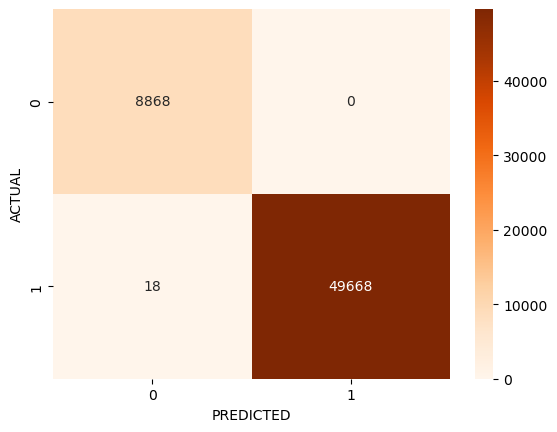

In [ ]:
confusion(y_train, y_train_prediction_probabilities, 'TRAIN')

the maximum value of tpr*(1-fpr) 0.35372987251001053 for threshold 0.975
Confusion matrix on TEST data
[[1329  888]
 [5092 7330]]


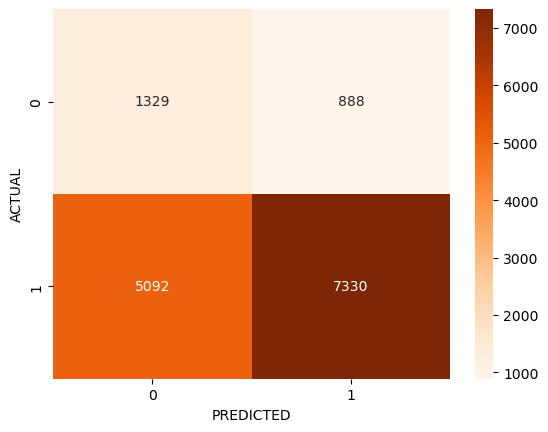

In [ ]:
confusion(y_test, y_test_prediction_probabilities, 'TEST')